In [11]:
        import pandas as pd
        import numpy as np
        import math
        import matplotlib.pyplot as plt
        
        import warnings
        warnings.filterwarnings('ignore')
        
        pd.set_option('display.max_columns',None)
        pd.set_option('display.max_row',None)
        pd.set_option('display.expand_frame_repr',False)
        pd.set_option('display.max_colwidth',None)

In [170]:
deliveries = pd.read_csv('ipl_2023_deliveries.csv')

In [172]:
df=deliveries

In [174]:
df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.1,Conway,Shami,0,0,0,0,0,0,NaN,NaN,NaN
1,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.2,Conway,Shami,0,1,0,1,0,0,NaN,NaN,NaN
2,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.3,Gaikwad,Shami,0,0,0,0,0,0,NaN,NaN,NaN
3,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.4,Gaikwad,Shami,1,0,0,0,0,0,NaN,NaN,NaN
4,202301,2023,1,"Mar 31, 2023","Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.5,Conway,Shami,0,0,0,0,0,0,NaN,NaN,NaN


In [176]:
df = df.rename(columns={'striker':'batsman'})

In [178]:
 df['isDot'] = df['runs_of_bat'].apply(lambda x: 1 if x == 0 else 0)
df['isOne'] = df['runs_of_bat'].apply(lambda x: 1 if x == 1 else 0)
df['isTwo'] = df['runs_of_bat'].apply(lambda x: 1 if x == 2 else 0)
df['isThree'] = df['runs_of_bat'].apply(lambda x: 1 if x == 3 else 0)
df['isFour'] = df['runs_of_bat'].apply(lambda x: 1 if x == 4 else 0)
df['isSix'] = df['runs_of_bat'].apply(lambda x: 1 if x == 6 else 0)

In [180]:
len(df['batsman'].unique())  #find total batsmen

176

In [186]:
#df.groupby(['batsman'])['runs_of_bat'].sum() #finding len of batsman in dataset
#df.groupby(['batsman','match_id'])['runs_of_bat'].sum().tail() # finding batsman run with match id 
#df.groupby(['batsman','match_id'])['runs_of_bat'].mean().head() # find average of batsman


batsman       match_id
Abdul Basith  202332      1.000000
Abdul Samad   202304      0.969697
              202310      2.100000
              202325      0.642857
              202340      1.333333
Name: runs_of_bat, dtype: float64

In [188]:
runs = pd.DataFrame(df.groupby(['batsman'])['runs_of_bat'].sum()).reset_index().rename(columns={'runs_of_bat':'runs'}) #run is data set and we rename the columns runs_of bat to runs

In [190]:
runs.tail()

,batsman,runs
171,Yash Dhull,16
172,Yudhvir Singh,1
173,Zampa,10
174,de Kock,143
175,du Plessis,730


In [192]:
#pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).head() #match_id is no of ball played by each player 
balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'}) #balls is data set and we rename the columns match_id to balls

In [194]:
balls.tail()

,batsman,balls
171,Yash Dhull,23
172,Yudhvir Singh,2
173,Zampa,17
174,de Kock,103
175,du Plessis,483


In [196]:
innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'innings'}) #from match id i extraed unique match id and than each match 
#is consider as played 1 inning than converted match id into innings using lambda

In [198]:
innings.tail()

,batsman,innings
171,Yash Dhull,3
172,Yudhvir Singh,2
173,Zampa,3
174,de Kock,4
175,du Plessis,14


In [200]:
dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})

In [202]:
dismissals.tail()

,batsman,dismissals
171,Yash Dhull,3
172,Yudhvir Singh,2
173,Zampa,3
174,de Kock,4
175,du Plessis,13


In [204]:
sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

In [206]:
sixes.tail()

,batsman,sixes
171,Yash Dhull,0
172,Yudhvir Singh,0
173,Zampa,0
174,de Kock,8
175,du Plessis,36


In [208]:
dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})

In [210]:
mega = pd.merge(innings,runs,on = 'batsman').merge( balls, on = 'batsman').merge( dismissals, on = 'batsman').merge( fours, on = 'batsman').merge( sixes, on = 'batsman')

In [212]:
mega.tail(1)

,batsman,innings,runs,balls,dismissals,fours,sixes
175,du Plessis,14,730,483,13,60,36


In [214]:
mega['RPI'] = mega.apply(lambda x: (x['runs']/x['innings']),axis = 1)

In [216]:
mega.tail(1)

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
175,du Plessis,14,730,483,13,60,36,52.142857


In [265]:
df[df.innings == 1].reset_index(drop = True).index

RangeIndex(start=0, stop=8991, step=1)

In [297]:
def ByInnings(df,current_innings):
    
    df = df[df.innings == current_innings]
    df.reset_index(inplace = True,drop = True)
    
    df['isDot'] = df['runs_of_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_of_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_of_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_of_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_of_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_of_bat'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['runs_of_bat'].sum()).reset_index().rename(columns={'runs_of_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})
    
    df = pd.merge(innings,runs,on = 'batsman').merge( balls, on = 'batsman').merge( dismissals, on = 'batsman').merge( fours, on = 'batsman').merge( sixes, on = 'batsman')
    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']),axis = 1)
    return df


In [299]:
ing1_df = ByInnings(df,1)

In [301]:
ing2_df = ByInnings(df,2)

In [303]:
ing1_df = ing1_df[['batsman','RPI']].rename(columns = {'RPI':'ing1_rpi'})

In [305]:
ing1_df.tail()

,batsman,ing1_rpi
145,Yash Dhull,2.000000
146,Yudhvir Singh,0.500000
147,Zampa,4.000000
148,de Kock,22.000000
149,du Plessis,53.777778


In [307]:
ing2_df = ing2_df[['batsman','RPI']].rename(columns = {'RPI':'ing2_rpi'})

In [293]:
ing2_df.tail()

,batsman,ing2_rpi
148,Willey,26.285714
149,Yash Dhull,7.500000
150,Zampa,38.133333
151,de Kock,2.000000
152,du Plessis,12.555556


In [309]:
comb= pd.merge(ing1_df,ing2_df, on = 'batsman')

In [311]:
comb = pd.merge(ing1_df,ing2_df,on='batsman', how = 'outer')

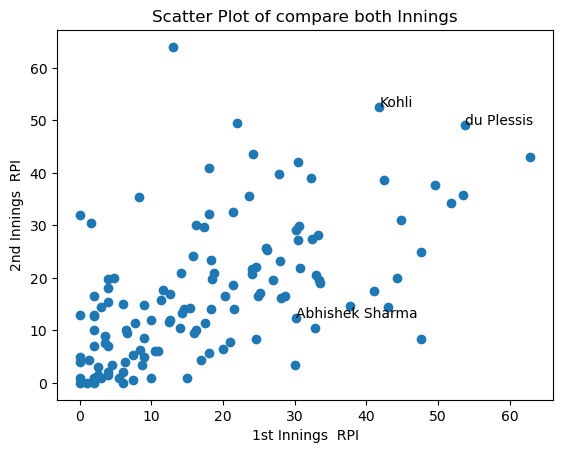

In [315]:
plt.scatter(comb['ing1_rpi'], comb['ing2_rpi'])
selected_player = ['du Plessis','Kohli','Will Jacks','Abhishek Sharma']
annotation = list(comb['batsman'])
plt.xlabel("1st Innings  RPI")
plt.ylabel("2nd Innings  RPI")
plt.title("Scatter Plot of compare both Innings")

for i, j in enumerate(annotation):
    if j in selected_player:
        plt.annotate(j,(comb['ing1_rpi'][i], comb['ing2_rpi'][i]))
    
plt.show()

In [12]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

def playerStatistics(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    return df

In [ ]:
df[df[

In [24]:
def ByInnings(df, current_innings):
    df = df[df.inning == current_innings]
    df.reset_index(inplace=True, drop=True)
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFours'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs': 'runs'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns={'match_id': 'balls'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id': 'innings'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed': 'dismissals'})
    Sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns={'isSix': 'Sixes'})
    Fours = pd.DataFrame(df.groupby(['batter'])['isFours'].sum()).reset_index().rename(columns={'isFours': 'Fours'})

    df = pd.merge(innings,runs,on ='batter').merge(balls,on ='batter').merge(dismissals,on ='batter').merge(Fours,on ='batter').merge(Sixes,on ='batter')
    df['RPI']=df.apply(lambda x:(x['runs']/x['innings']),axis=1)
    return df

In [26]:
df.runs(1)

AttributeError: 'DataFrame' object has no attribute 'runs'